In [1]:
# Import dep
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from scipy.stats import linregress
import csv
#!pip install Census
from census import Census
#!pip install gmaps 
import gmaps

from scipy import stats



In [2]:

path= "/content/gdrive/MyDrive/project_team_2/city_pop_data.csv"
city_df = pd.read_csv('city_pop_data.csv')


In [3]:
city_df

,City,State,Population
0,Henderson,Nevada,320189
1,Irving,Texas,239798
2,Virginia Beach,Virginia,449974
3,Boise,Idaho,228959
4,El Paso,Texas,681728
5,St Louis,Missouri,300576
6,Cleveland,Ohio,381009
7,Baltimore,Mayland,593490
8,Memphis,Tennessee,651073
9,Detroit,Michigan,670031


In [4]:
#Import Poverty data
path= "/content/gdrive/MyDrive/project_team_2/poverty_data1.csv"
poverty_df = pd.read_csv('poverty_data1.csv')
poverty_df.head()

,City,State,Poverty Rate
0,Henderson,Nevada,8.5
1,Irving,Texas,13.5
2,Virginia Beach,Virginia,7.6
3,Boise,Idaho,13.5
4,El Paso,Texas,20.0


In [5]:
agency_code = ['TX0571500','TX0710200','NV0020300','ID0010100','VA1280000','MI8234900','MOSPD0000','TNMPD0000','MDBPD0000','OHCLP0000']
cities = ['Irving','El Paso','Henderson','Boise','Virginia Beach','Detroit','St Louis','Memphis','Baltimore','Cleveland']
city_police_df = pd.DataFrame({
    'City':cities,
    'Agency Code':agency_code
})

In [6]:
#Violent crime data from FBI API

url1 = "https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/"
url2 = "/violent-crime/2019/2019?API_KEY="
fbi_api_key = "iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
violent_crimes = []

for code in agency_code:
  agencies_data = requests.get(url1 + code + url2 + fbi_api_key).json()
  violent_crimes.append(agencies_data)

vc_actual = [violent_crimes[x]['results'][0]['actual'] for x in range(len(violent_crimes))]
print("Violent crime city rates (actual): ")
print(vc_actual)
city_police_df['Crimes (Actual)'] = vc_actual
city_police_df

Violent crime city rates (actual): 
[617, 2509, 543, 756, 636, 13622, 5792, 12723, 11101, 6203]


,City,Agency Code,Crimes (Actual)
0,Irving,TX0571500,617
1,El Paso,TX0710200,2509
2,Henderson,NV0020300,543
3,Boise,ID0010100,756
4,Virginia Beach,VA1280000,636
5,Detroit,MI8234900,13622
6,St Louis,MOSPD0000,5792
7,Memphis,TNMPD0000,12723
8,Baltimore,MDBPD0000,11101
9,Cleveland,OHCLP0000,6203


In [7]:
crime_pop_df = city_police_df.merge(city_df,on="City",how="left")
crime_pop_df['Crime Rate (per 1000)'] = crime_pop_df['Crimes (Actual)'].astype(float) / (crime_pop_df['Population'].astype(float)/1000)
crime_pop_df

,City,Agency Code,Crimes (Actual),State,Population,Crime Rate (per 1000)
0,Irving,TX0571500,617,Texas,239798,2.572999
1,El Paso,TX0710200,2509,Texas,681728,3.680353
2,Henderson,NV0020300,543,Nevada,320189,1.695873
3,Boise,ID0010100,756,Idaho,228959,3.301901
4,Virginia Beach,VA1280000,636,Virginia,449974,1.413415
5,Detroit,MI8234900,13622,Michigan,670031,20.330403
6,St Louis,MOSPD0000,5792,Missouri,300576,19.269669
7,Memphis,TNMPD0000,12723,Tennessee,651073,19.541588
8,Baltimore,MDBPD0000,11101,Mayland,593490,18.704612
9,Cleveland,OHCLP0000,6203,Ohio,381009,16.280455


In [8]:
#read csv file on police density in each city
#Henderson, NV currently missing, working on finding that data -Alyssa
file = "/content/gdrive/MyDrive/project_team_2/police_density_data.csv"
police_df = pd.read_csv('police_density_data.csv')

In [9]:
police_df.head()

,City,Population,Total_Law,Total_Officers,Total_Civilians
0,Henderson,320189,391,391,0
1,Irving,245423,525,364,161
2,Virginia Beach,449038,938,760,178
3,Boise,231214,385,298,87
4,El Paso,686793,1412,1171,241


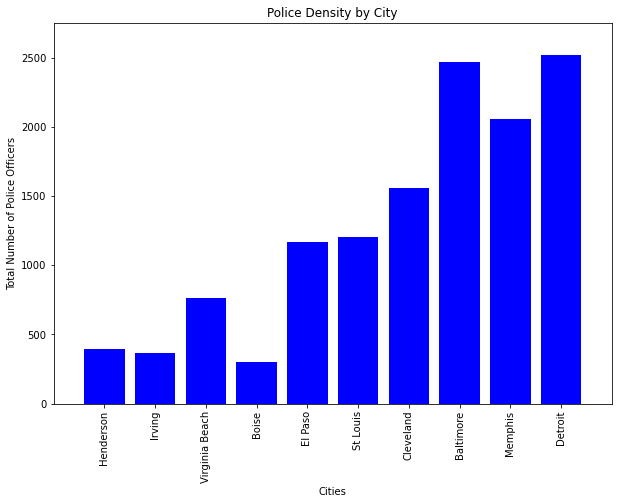

In [10]:
#visualization for police density by city
x_axis = np.arange(len(police_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,7))
plt.bar(x_axis, police_df['Total_Officers'], color='b', align='center')
plt.xticks(tick_locations, police_df['City'], rotation='vertical')

plt.xlim(-1,len(x_axis))
plt.ylim(0,2750)

plt.title('Police Density by City')
plt.xlabel('Cities')
plt.ylabel('Total Number of Police Officers')

plt.tight_layout
plt.show()

The r-value is: 0.6112121739898603


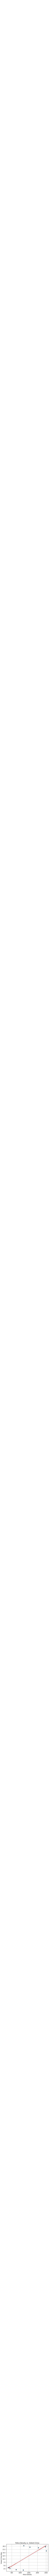

<Figure size 720x504 with 0 Axes>

In [11]:
#visualization police density vs violent crime
x_axis = police_df['Total_Officers']
y_axis = crime_pop_df['Crime Rate (per 1000)']

plt.scatter(x_axis, y_axis, marker='o', edgecolors='black')

plt.title('Police Density vs. Violent Crime')
plt.xlabel('Police Density')
plt.ylabel('Violent Crime Rate')
plt.grid(True)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(1500,2000),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

plt.figure(figsize=(10,7))
plt.show()

In [16]:
cities = police_df["City"]
population = city_df["Population"]/1000
poverty_percentage = poverty_df["Poverty Rate"]
crime_rate=crime_pop_df['Crime Rate (per 1000)']

final_data_df=pd.DataFrame({"City":cities,"Population":population,"Poverty Rate":poverty_percentage,"Crime Rate":crime_rate})
final_data_df.head(10)

,City,Population,Poverty Rate,Crime Rate
0,Henderson,320.189,8.5,2.572999
1,Irving,239.798,13.5,3.680353
2,Virginia Beach,449.974,7.6,1.695873
3,Boise,228.959,13.5,3.301901
4,El Paso,681.728,20.0,1.413415
5,St Louis,300.576,24.2,20.330403
6,Cleveland,381.009,34.6,19.269669
7,Baltimore,593.490,21.8,19.541588
8,Memphis,651.073,26.8,18.704612
9,Detroit,670.031,36.4,16.280455


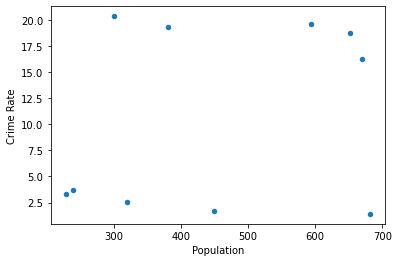

In [17]:
pop_crime_plot = final_data_df.plot.scatter('Population','Crime Rate')
pop_crime_plot

Text(0.5, 1.0, 'Poverty Rate by City')

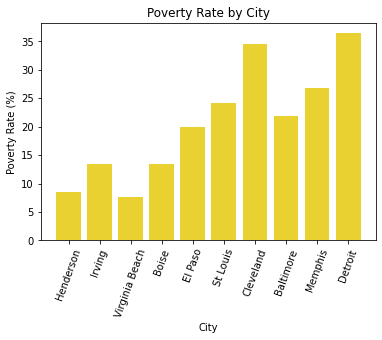

In [18]:
# Poverty Rate by City
plt.bar(cities,poverty_percentage,color=(0.9, 0.8, 0.1, 0.9))
    
degrees = 70
plt.xticks(rotation=degrees)

plt.xlabel('City')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate by City')


Text(0.5, 1.0, 'Crime Rate vs. Poverty Rate')

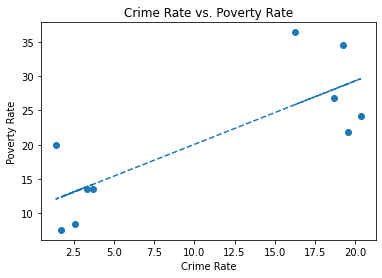

In [41]:
x = final_data_df["Crime Rate"]
y = final_data_df["Poverty Rate"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x , y)
regress_values = x * slope + intercept

colors = np.random

m_fit = slope * x + intercept
plt.scatter(x,y)
            

plt.plot(x,m_fit,"--")
plt.xlabel('Crime Rate')
plt.ylabel('Poverty Rate')
plt.title('Crime Rate vs. Poverty Rate')





In [38]:
for city in cities:

    p_rate = final_data_df.loc[final_data_df["City"]== city,"Poverty Rate"]

    #print(p_rate)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quantile = p_rate.quantile([0.25,0.5,0.75])
    lower_quartile = quantile[.25]
    upper_quartile = quantile[.75]
 
    IQR = upper_quartile - lower_quartile
    
   
    # Determine outliers using upper and lower bounds
    upper_bound = upper_quartile + 1.5*(IQR)
    
    lower_bound = lower_quartile - 1.5*(IQR)
   
    outliers = p_rate.loc[(p_rate > upper_bound) | (p_rate < lower_bound)]
    #print(outliers)
    
print(outliers)

Series([], Name: Poverty Rate, dtype: float64)


# Hypothesis Testing : 

# Uo (Null Hypothesis): There is no signifincance relationship between crime rate and population across cities

# U1 (Hypothesis): There is signifincance relationship between crime rate and population across cities


In [39]:
pop= final_data_df['Population']
crime_rate = final_data_df['Crime Rate']

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(pop, crime_rate, equal_var=False)

Ttest_indResult(statistic=7.62872294153723, pvalue=3.1491835605699476e-05)